## Ensemble Techniques:
Bagging: parallel trees
Boosting: sequential trees

## Data Ingestion

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import pandas as pd

path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/train_loan.csv"
df = pd.read_csv(path)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target feature:
    loan_status:
    0=> Not Approved
    1=> Approved

In [3]:
df["loan_status"].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

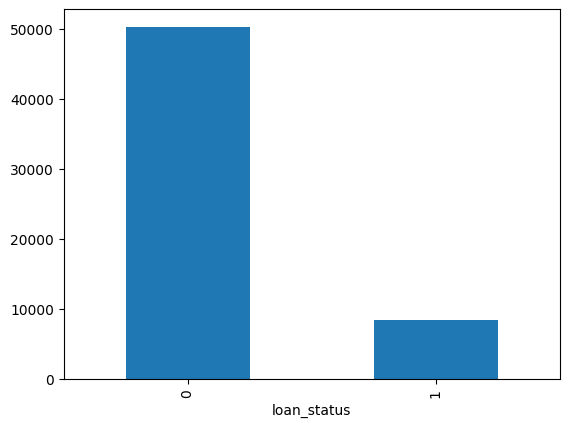

In [4]:
df["loan_status"].value_counts().plot(kind="bar")

In [5]:
(df["loan_status"].value_counts() / df["id"].count()) * 100

loan_status
0    85.761787
1    14.238213
Name: count, dtype: float64

## This represents an imbalanced dataset. Let's handle this with Ensemble techniques

In [6]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features

In [8]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [9]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data Cleaning

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [14]:
pre = ColumnTransformer([("cat", cat_pipe, cat), ("con", con_pipe, con)]).set_output(
    transform="pandas"
)

In [15]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298


## Split the dataset into training and testing
    Training    Testing
    60          40
    75          25
    80          20

In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.70, random_state=42
)

In [18]:
xtrain.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
52748,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.422806,-0.106673,-1.187200,-1.027643,-0.447454,-1.082304,-0.450108
7648,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.731951,-0.606715,-0.682117,-0.632227,0.761903,-0.209808,2.031798
4217,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.074446,-0.897587,-1.187200,0.949438,-0.345301,3.389236,0.294464
37793,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.025147,0.580588,-1.297244,-1.732601,-1.409489,-0.698298
28209,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,-0.396674,-0.177035,-0.668173,1.493449,-0.536994,-0.946489


In [19]:
xtest.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
4657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108
56440,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108
42117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274
10849,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489
39395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036


In [20]:
ytrain.head()

,loan_status
52748,0
7648,0
4217,1
37793,0
28209,1


In [21]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


## 1) Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

"""
#model = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    min_samples_leaf=3,
    min_samples_split=11,
    criterion="gini",
)
#model.fit(xtrain, ytrain)
"""

'\n#model = RandomForestClassifier(\n    n_estimators=10,\n    max_depth=5,\n    min_samples_leaf=3,\n    min_samples_split=11,\n    criterion="gini",\n)\n#model.fit(xtrain, ytrain)\n'

In [23]:
# model.score(xtrain, ytrain)

In [24]:
# model.score(xtest, ytest)

In [25]:
xtrain.shape

(41051, 26)

## Hyperparameter tuning

In [26]:
params = {"n_estimators": [10, 30, 50, 70, 100], "max_depth": [4, 5, 8, 10, 12]}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
base_model = RandomForestClassifier()
# rscv = RandomizedSearchCV( estimator=base_model, param_distributions=params, cv=5, scoring="f1_macro")
# rscv.fit(xtrain, ytrain)

In [29]:
# rscv.best_score_

In [30]:
# rscv.best_params_

In [31]:
# best_RFC = rscv.best_estimator_
# best_RFC.fit(xtrain, ytrain)

In [32]:
# best_RFC.score(xtrain, ytrain)

In [33]:
# best_RFC.score(xtest, ytest)

## 2) Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
"""
model2 = GradientBoostingClassifier(
n_estimators=15,




    learning_rate=0.5,




    max_depth=10,




    min_samples_split=10,




    min_samples_leaf=3,




)




model2.fit(xtrain, ytrain)
"""

'\nmodel2 = GradientBoostingClassifier(\nn_estimators=15,\n\n\n\n\n    learning_rate=0.5,\n\n\n\n\n    max_depth=10,\n\n\n\n\n    min_samples_split=10,\n\n\n\n\n    min_samples_leaf=3,\n\n\n\n\n)\n\n\n\n\nmodel2.fit(xtrain, ytrain)\n'

In [36]:
# model2.score(xtrain, ytrain)

In [37]:
# model2.score(xtest, ytest)

In [38]:
import numpy as np

In [39]:
params2 = {
    "n_estimators": [10, 30, 50, 70, 100],
    "max_depth": [4, 5, 8, 10, 12],
    "learning_rate": [0.01, 0.1, 0.15, 0.2, 0.3, 0.5],
}

In [40]:
"""
base_model2 = GradientBoostingClassifier()




rscv2 = RandomizedSearchCV(




    estimator=base_model2, param_distributions=params2, cv=5, scoring="f1_macro"




)




rscv2.fit(xtrain, ytrain)
"""

'\nbase_model2 = GradientBoostingClassifier()\n\n\n\n\nrscv2 = RandomizedSearchCV(\n\n\n\n\n    estimator=base_model2, param_distributions=params2, cv=5, scoring="f1_macro"\n\n\n\n\n)\n\n\n\n\nrscv2.fit(xtrain, ytrain)\n'

In [41]:
# rscv2.best_score_

In [42]:
# rscv2.best_params_

In [43]:
# best_GBC = rscv2.best_estimator_
# best_GBC.fit(xtrain, ytrain)

In [44]:
# best_GBC.score(xtrain, ytrain)

In [45]:
# best_GBC.score(xtest, ytest)

gradient test: 95
randome test: 94

## 3) XGBoost

pip install xgboost
### IFF you are getting "pip not found" error when running pip install xgboost, follow below steps in terminal :
    cd .venv/Scripts => run this command
    python.exe -m ensurepip => run this command
    pip install xgboost => run this command

In [46]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from xgboost import XGBClassifier

model3 = XGBClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=3,
    min_samples_split=2,
)

model3.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, min_samples_leaf=3,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, ...)

In [48]:
model3.score(xtrain, ytrain)

0.9561764634235463

In [49]:
model3.score(xtest, ytest)

0.9528816642037058

## hyperparameter tuning

In [50]:
params3 = {"n_estimators": [75, 100, 150, 200, 250], "learning_rate": [0.01, 0.1, 0.2]}

In [51]:
model_xgb = XGBClassifier()
rscv3 = RandomizedSearchCV(
    estimator=model_xgb, scoring="f1_macro", param_distributions=params3, cv=5
)
rscv3.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [75, 100, 150, 200,
                                                         250]},
                   scoring='f1_macro')

In [52]:
rscv3.best_score_

np.float64(0.8911834560773428)

In [53]:
rscv3.best_params_

{'n_estimators': 75, 'learning_rate': 0.2}

In [54]:
best_XGC = rscv3.best_estimator_
best_XGC.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
best_XGC.score(xtrain, ytrain)

0.9585150179045577

In [56]:
best_XGC.score(xtest, ytest)

0.9530521768784813

## Out of sample predictions
we can choose either Gradient Boost or XG Boost 

In [57]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/test_loan.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [58]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length'])])

In [59]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,con__person_age,con__person_income,con__person_emp_length,con__loan_amnt,con__loan_int_rate,con__loan_percent_income,con__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108


In [60]:
loan_predicted = best_XGC.predict(xnew_pre)
loan_predicted[:5]

array([1, 0, 1, 0, 0])

In [61]:
xnew["Loan_status_Predicted"] = loan_predicted
xnew

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Loan_status_Predicted
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,1
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,0
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3,0
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25,0
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,0


In [62]:
xnew.to_csv("Loan status predicted", index=False)